In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_1','text'], axis=1, inplace=True)
df.head()

,_id,task_2,task_3,task_4,text_clean
0,Hindi_image_1817.jpg,Neutral,Vulgar,Abusive,Ba8@ DaNn G@rainiD IR T३ PDBB WRHE W PRD BCEN ...
1,Hindi_image_7.jpg,Negative,Vulgar,Abusive,"Nari nari mat kar pagle, Nari he nark ka dwar...."
2,Hindi_image_1.jpg,Positive,Non Vulgar,Abusive,Kitni push ops maarsakte ho dafly? 5 aur agar ...
3,Hindi_image_32.jpg,Negative,Vulgar,Abusive,अब इसमें मेरी कहां गलती है बताओ.. तरबूज़ वाली क...
4,Hindi_image_1714.jpg,Negative,Non Vulgar,Abusive,"""KUDI MENU KEHNDl... 'MENU JUTI LA DE SONIYE....."


Text(0, 0.5, 'Frequency')

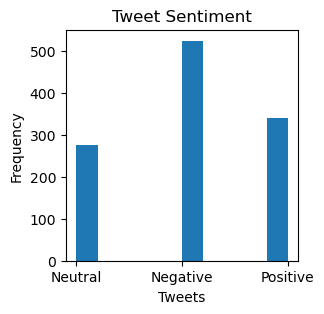

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_2'])

ax.set_title('Tweet Sentiment')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_2']

In [5]:
import pickle
# 保存模型和特征转换器
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidfconverter, f)
    
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [6]:
print("y:",y[:10])

y: [1 0 2 0 0 2 0 0 2 0]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[17 36 13]
 [ 8 24 15]
 [12 32 15]]
              precision    recall  f1-score   support

           0       0.46      0.26      0.33        66
           1       0.26      0.51      0.35        47
           2       0.35      0.25      0.29        59

    accuracy                           0.33       172
   macro avg       0.36      0.34      0.32       172
weighted avg       0.37      0.33      0.32       172



In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[56  5  5]
 [32  3 12]
 [29 10 20]]
              precision    recall  f1-score   support

           0       0.48      0.85      0.61        66
           1       0.17      0.06      0.09        47
           2       0.54      0.34      0.42        59

    accuracy                           0.46       172
   macro avg       0.40      0.42      0.37       172
weighted avg       0.41      0.46      0.40       172



In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[60  3  3]
 [44  2  1]
 [50  4  5]]
              precision    recall  f1-score   support

           0       0.39      0.91      0.55        66
           1       0.22      0.04      0.07        47
           2       0.56      0.08      0.15        59

    accuracy                           0.39       172
   macro avg       0.39      0.35      0.25       172
weighted avg       0.40      0.39      0.28       172



In [11]:
dt3 = classifier

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[60  3  3]
 [34  3 10]
 [32  9 18]]
              precision    recall  f1-score   support

           0       0.48      0.91      0.62        66
           1       0.20      0.06      0.10        47
           2       0.58      0.31      0.40        59

    accuracy                           0.47       172
   macro avg       0.42      0.43      0.37       172
weighted avg       0.44      0.47      0.40       172



In [13]:
dt1 = classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 48)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[43 16  7]
 [26 11 10]
 [23 16 20]]
              precision    recall  f1-score   support

           0       0.47      0.65      0.54        66
           1       0.26      0.23      0.24        47
           2       0.54      0.34      0.42        59

    accuracy                           0.43       172
   macro avg       0.42      0.41      0.40       172
weighted avg       0.43      0.43      0.42       172



In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[52  7  7]
 [32  7  8]
 [23 18 18]]
              precision    recall  f1-score   support

           0       0.49      0.79      0.60        66
           1       0.22      0.15      0.18        47
           2       0.55      0.31      0.39        59

    accuracy                           0.45       172
   macro avg       0.42      0.41      0.39       172
weighted avg       0.43      0.45      0.41       172



In [16]:
from sklearn.model_selection import RepeatedKFold

In [17]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score



C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.4434782608695652
0.47368421052631576
0.5701754385964912


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.5877192982456141


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [18]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.75      0.62        52
           1       0.36      0.15      0.22        26
           2       0.50      0.42      0.45        36

    accuracy                           0.51       114
   macro avg       0.47      0.44      0.43       114
weighted avg       0.48      0.51      0.48       114



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.4956521739130435
0.5877192982456141
0.5964912280701754


In [20]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        57
           1       0.23      0.10      0.14        29
           2       0.44      0.54      0.48        28

    accuracy                           0.50       114
   macro avg       0.42      0.44      0.42       114
weighted avg       0.46      0.50      0.47       114



In [21]:
dt2 = rf

In [22]:
import pickle

# 假设 dt1, dt2, dt3 是你已经训练好的模型
pickle.dump(dt1, open('finalized_svc_model1.sav', 'wb'))
pickle.dump(dt2, open('finalized_rfc_model1.sav', 'wb'))
pickle.dump(dt3, open('finalized_knc_model1.sav', 'wb'))
